In [ ]:
#### Statistics Basics Assignment Practical Questions ####

1. How do you calculate the mean, median, and mode of a dataset?


In [ ]:
import statistics

def calculate_stats(data):
  """Calculates the mean, median, and mode of a dataset.

  Args:
    data: A list of numerical values.

  Returns:
    A dictionary containing the mean, median, and mode of the dataset.
    Returns an error message if the dataset is empty or invalid.
  """
  if not data:
    return "Error: Dataset is empty."
  if not all(isinstance(x, (int, float)) for x in data):
      return "Error: Dataset contains non-numeric values."

  try:
    mean = statistics.mean(data)
    median = statistics.median(data)
    mode = statistics.mode(data)
    return {"mean": mean, "median": median, "mode": mode}
  except statistics.StatisticsError:  # Handle cases where mode is not unique
    return {"mean": mean, "median": median, "mode": "No unique mode"}


# Example usage
data = [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
stats = calculate_stats(data)
print(stats)

data2 = [1,2,3,4,5]
stats2 = calculate_stats(data2)
print(stats2)

data3 = [1,1,1,2,2,3,3,3]
stats3 = calculate_stats(data3)
print(stats3)

data4 = []
stats4 = calculate_stats(data4)
print(stats4)

data5 = [1,2,'a']
stats5 = calculate_stats(data5)
stats5


{'mean': 5, 'median': 5.0, 'mode': 5}
{'mean': 3, 'median': 3, 'mode': 1}
{'mean': 2, 'median': 2.0, 'mode': 1}
Error: Dataset is empty.


'Error: Dataset contains non-numeric values.'

2. Write a Python program to compute the variance and standard deviation of a dataset?

In [ ]:
import statistics

def calculate_variance_stddev(data):
    """Calculates the variance and standard deviation of a dataset.

    Args:
      data: A list of numerical values.

    Returns:
      A dictionary containing the variance and standard deviation of the dataset.
      Returns an error message if the input is invalid.
    """
    if not data:
        return "Error: Dataset is empty."
    if not all(isinstance(x, (int, float)) for x in data):
        return "Error: Dataset contains non-numeric values."

    try:
        variance = statistics.variance(data)
        stddev = statistics.stdev(data)
        return {"variance": variance, "stddev": stddev}
    except statistics.StatisticsError:
        return "Error: Could not calculate variance/stddev"


# Example usage
data = [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
stats = calculate_variance_stddev(data)
print(stats)

data2 = [1,2,3,4,5]
stats2 = calculate_variance_stddev(data2)
print(stats2)

data3 = [1,1,1,2,2,3,3,3]
stats3 = calculate_variance_stddev(data3)
print(stats3)

data4 = []
stats4 = calculate_variance_stddev(data4)
print(stats4)

data5 = [1,2,'a']
stats5 = calculate_variance_stddev(data5)
stats5


{'variance': 6.666666666666667, 'stddev': 2.581988897471611}
{'variance': 2.5, 'stddev': 1.5811388300841898}
{'variance': 0.8571428571428571, 'stddev': 0.9258200997725514}
Error: Dataset is empty.


'Error: Dataset contains non-numeric values.'

3. Create a dataset and classify it into nominal, ordinal, interval, and ratio types?

In [ ]:
def create_and_classify_dataset():
    """Creates a sample dataset and classifies its features."""

    dataset = {
        "feature_name": ["color", "education_level", "temperature", "income", "ranking"],
        "data_points": [
            ["red", "Bachelor's", 25, 50000, 3],
            ["blue", "Master's", 30, 75000, 1],
            ["green", "High School", 20, 30000, 5],
            ["red", "PhD", 35, 100000, 2],
            ["blue", "Bachelor's", 28, 60000, 4],
        ],
        "data_type": [
            "nominal", "ordinal", "interval", "ratio", "ordinal"
        ]
    }

    print("Dataset:")
    for i in range(len(dataset["feature_name"])):
      print(f"{dataset['feature_name'][i]} ({dataset['data_type'][i]}): {dataset['data_points'][0][i]}")

    # Explanation of data types
    explanations = {
        "nominal": "Categorical data without inherent order (e.g., colors).",
        "ordinal": "Categorical data with a meaningful order but unequal intervals (e.g., education levels, rankings).",
        "interval": "Numerical data with equal intervals but no true zero point (e.g., temperature in Celsius/Fahrenheit).",
        "ratio": "Numerical data with equal intervals and a true zero point (e.g., income, height).",
    }
    print("\nData Type Explanations:")
    for data_type, explanation in explanations.items():
        print(f"{data_type}: {explanation}")


create_and_classify_dataset()


Dataset:
color (nominal): red
education_level (ordinal): Bachelor's
temperature (interval): 25
income (ratio): 50000
ranking (ordinal): 3

Data Type Explanations:
nominal: Categorical data without inherent order (e.g., colors).
ordinal: Categorical data with a meaningful order but unequal intervals (e.g., education levels, rankings).
interval: Numerical data with equal intervals but no true zero point (e.g., temperature in Celsius/Fahrenheit).
ratio: Numerical data with equal intervals and a true zero point (e.g., income, height).


4. Implement sampling techniques like random sampling and stratified sampling.

In [ ]:
import random

def random_sampling(data, sample_size):
    """Performs random sampling on a dataset.

    Args:
      data: The dataset to sample from.
      sample_size: The desired size of the sample.

    Returns:
      A random sample of the specified size.
      Returns an error message if the sample size is invalid.
    """
    if sample_size > len(data) or sample_size <=0:
        return "Error: Invalid sample size."
    return random.sample(data, sample_size)

def stratified_sampling(data, strata, sample_size_per_strata):
    """Performs stratified sampling on a dataset.

    Args:
        data: The dataset to sample from (list of tuples, where each tuple represents a data point and its stratum).
        strata: A list of unique stratum identifiers.
        sample_size_per_strata: The desired sample size for each stratum.

    Returns:
        A stratified sample of the specified size.
        Returns an error message if the strata or sample sizes are invalid.
    """
    if not isinstance(data, list) or not all(isinstance(item, tuple) and len(item) == 2 for item in data):
        return "Error: Data must be a list of (data_point, stratum) tuples."

    if not isinstance(strata, list) or not all(isinstance(s, (str, int)) for s in strata):
        return "Error: Strata must be a list of strings or integers."

    if not isinstance(sample_size_per_strata, int) or sample_size_per_strata <= 0:
      return "Error: Invalid sample size per strata"

    stratified_samples = {}

    for stratum in strata:
        stratum_data = [x[0] for x in data if x[1] == stratum]
        if len(stratum_data) < sample_size_per_strata:
            return f"Error: Not enough data points in stratum {stratum} to create a sample of size {sample_size_per_strata}"

        stratified_samples[stratum] = random.sample(stratum_data, sample_size_per_strata)

    #Combine samples
    combined_sample = []
    for stratum in strata:
        combined_sample.extend(stratified_samples[stratum])

    return combined_sample

# Example usage of random sampling
dataset = list(range(1, 101))  # Example dataset (numbers from 1 to 100)
sample = random_sampling(dataset, 10)
print("Random Sample:", sample)


# Example usage of stratified sampling
data_with_strata = [
    (1, 'A'), (2, 'A'), (3, 'A'), (4, 'B'), (5, 'B'), (6, 'B'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C')
]

strata_values = ['A', 'B', 'C']

stratified_sample = stratified_sampling(data_with_strata, strata_values, 2)
print("Stratified Sample:", stratified_sample)


Random Sample: [48, 63, 5, 60, 7, 44, 62, 66, 38, 52]
Stratified Sample: [2, 1, 6, 5, 8, 9]


5. Write a Python function to calculate the range of a dataset.

In [ ]:
def calculate_range(data):
    """Calculates the range of a dataset.

    Args:
      data: A list of numerical values.

    Returns:
      The range of the dataset (max - min).
      Returns an error message if the dataset is empty or invalid.
    """
    if not data:
        return "Error: Dataset is empty."
    if not all(isinstance(x, (int, float)) for x in data):
        return "Error: Dataset contains non-numeric values."

    return max(data) - min(data)

# Example usage
data = [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
dataset_range = calculate_range(data)
print(f"Range of the dataset: {dataset_range}")

data2 = []
dataset_range2 = calculate_range(data2)
print(dataset_range2)

data3 = [1,2,'a']
dataset_range3 = calculate_range(data3)
dataset_range3


Range of the dataset: 8
Error: Dataset is empty.


'Error: Dataset contains non-numeric values.'

6. Create a dataset and plot its histogram to visualize skewness.

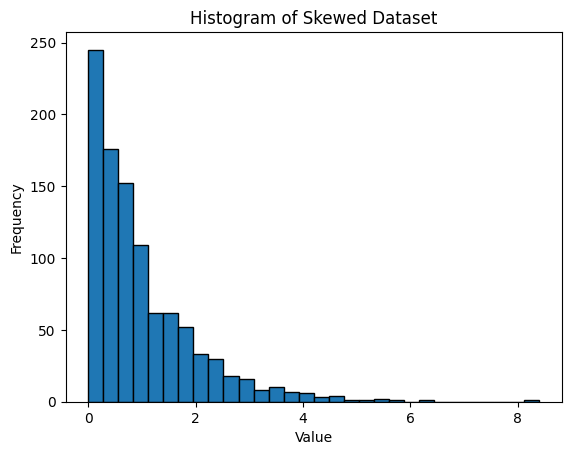

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a skewed dataset (example: right-skewed)
data = np.random.exponential(scale=1, size=1000)  # You can change the distribution and parameters

# Plot the histogram
plt.hist(data, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Skewed Dataset')
plt.show()


7. Calculate skewness and kurtosis of a dataset using Python libraries.

In [ ]:
from scipy.stats import skew, kurtosis

# Example dataset (replace with your actual data)
data = np.random.randn(100)  # Example: normally distributed data

# Calculate skewness
skewness = skew(data)
print(f"Skewness: {skewness}")

# Calculate kurtosis (Fisher's definition, excess kurtosis)
kurt = kurtosis(data)
print(f"Kurtosis (Fisher): {kurt}")

# Calculate kurtosis (Pearson's definition)
kurt_pearson = kurtosis(data, fisher=False)
print(f"Kurtosis (Pearson): {kurt_pearson}")


Skewness: 0.1578058044342519
Kurtosis (Fisher): 0.7431087130688976
Kurtosis (Pearson): 3.7431087130688976


8. Generate a dataset and demonstrate positive and negative skewness.

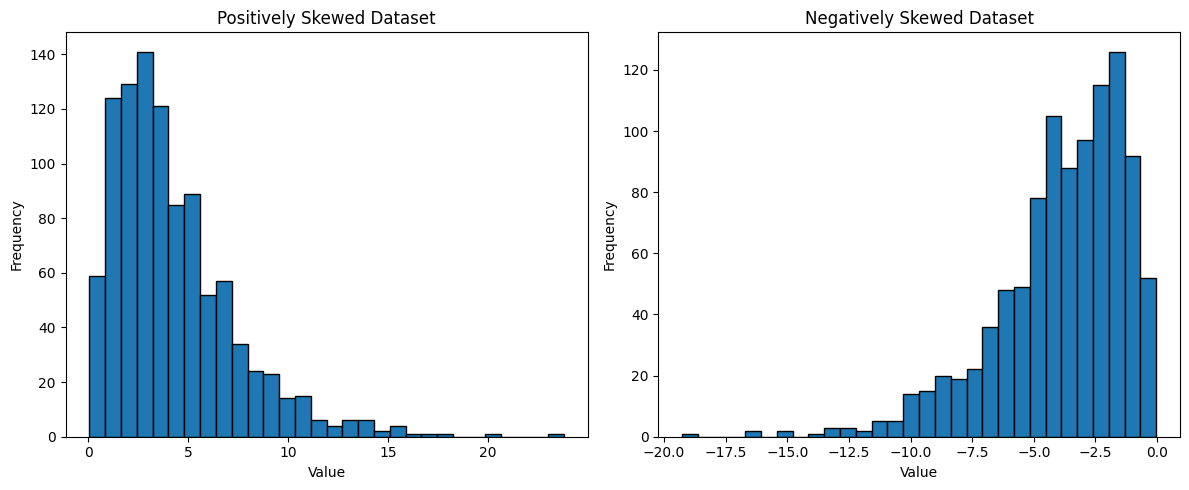

Skewness of positive skewed data: 1.5694065197592795
Skewness of negative skewed data: -1.3411349300191173


In [ ]:
# Generate a positively skewed dataset
positive_skew_data = np.random.gamma(2, 2, 1000)

# Generate a negatively skewed dataset
negative_skew_data = -np.random.gamma(2, 2, 1000)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(positive_skew_data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Positively Skewed Dataset')

plt.subplot(1, 2, 2)
plt.hist(negative_skew_data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Negatively Skewed Dataset')

plt.tight_layout()
plt.show()

# Calculate skewness for verification
positive_skewness = skew(positive_skew_data)
negative_skewness = skew(negative_skew_data)

print(f"Skewness of positive skewed data: {positive_skewness}")
print(f"Skewness of negative skewed data: {negative_skewness}")


9. Write a Python script to calculate covariance between two datasets.

In [ ]:
import numpy as np

def calculate_covariance(dataset1, dataset2):
    """Calculates the covariance between two datasets.

    Args:
      dataset1: A list or numpy array of numerical values.
      dataset2: A list or numpy array of numerical values.

    Returns:
      The covariance between the two datasets.
      Returns an error message if the input is invalid.
    """
    if not isinstance(dataset1, (list, np.ndarray)) or not isinstance(dataset2, (list, np.ndarray)):
        return "Error: Inputs must be lists or numpy arrays."

    if len(dataset1) != len(dataset2):
        return "Error: Datasets must have the same length."

    if not all(isinstance(x, (int, float)) for x in dataset1) or not all(isinstance(x, (int, float)) for x in dataset2):
        return "Error: Datasets must contain numerical values."

    dataset1 = np.array(dataset1)
    dataset2 = np.array(dataset2)

    return np.cov(dataset1, dataset2)[0, 1] #Covariance of x and y is at index [0,1] or [1,0]

# Example usage:
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]
covariance = calculate_covariance(data1, data2)
print(f"Covariance: {covariance}")

data3 = [1,2,3,4,5]
data4 = [1,2,3,4,6]
covariance2 = calculate_covariance(data3,data4)
covariance2


Covariance: -2.5


3.0

10. Write a Python script to calculate the correlation coefficient between two datasets.

In [ ]:
def calculate_correlation(dataset1, dataset2):
    """Calculates the correlation coefficient between two datasets.

    Args:
      dataset1: A list or numpy array of numerical values.
      dataset2: A list or numpy array of numerical values.

    Returns:
      The correlation coefficient between the two datasets.
      Returns an error message if the input is invalid.
    """
    if not isinstance(dataset1, (list, np.ndarray)) or not isinstance(dataset2, (list, np.ndarray)):
        return "Error: Inputs must be lists or numpy arrays."

    if len(dataset1) != len(dataset2):
        return "Error: Datasets must have the same length."

    if not all(isinstance(x, (int, float)) for x in dataset1) or not all(isinstance(x, (int, float)) for x in dataset2):
        return "Error: Datasets must contain numerical values."

    dataset1 = np.array(dataset1)
    dataset2 = np.array(dataset2)

    return np.corrcoef(dataset1, dataset2)[0, 1]

# Example usage:
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]
correlation = calculate_correlation(data1, data2)
print(f"Correlation Coefficient: {correlation}")

data3 = [1,2,3,4,5]
data4 = [1,2,3,4,6]
correlation2 = calculate_correlation(data3,data4)
correlation2


Correlation Coefficient: -0.9999999999999999


0.9863939238321436

11. Create a scatter plot to visualize the relationship between two variables.

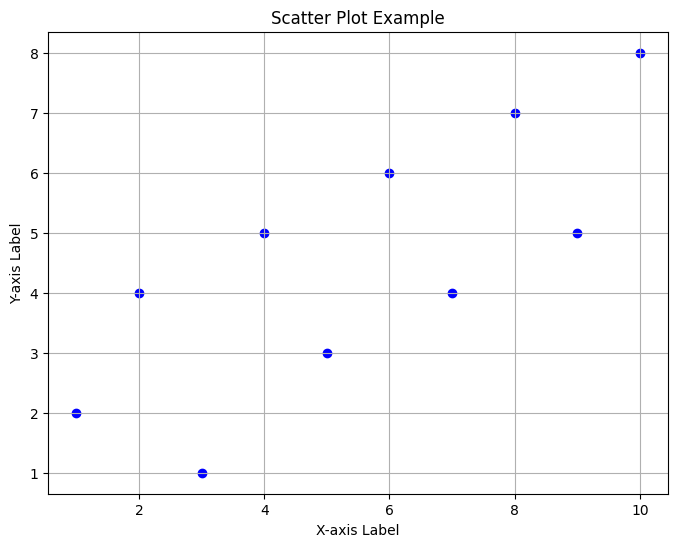

In [ ]:
import matplotlib.pyplot as plt

def create_scatter_plot(x_values, y_values, x_label, y_label, title):
    """Creates a scatter plot to visualize the relationship between two variables.

    Args:
        x_values: A list or numpy array of x-values.
        y_values: A list or numpy array of y-values.
        x_label: Label for the x-axis.
        y_label: Label for the y-axis.
        title: Title for the plot.
    """
    if len(x_values) != len(y_values):
        print("Error: x_values and y_values must have the same length.")
        return

    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(x_values, y_values, marker='o', color='blue')  # Customize marker and color
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)  # Add a grid for better readability
    plt.show()


# Example Usage
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 1, 5, 3, 6, 4, 7, 5, 8]  # Example y-values (replace with your data)

create_scatter_plot(x, y, "X-axis Label", "Y-axis Label", "Scatter Plot Example")


12.  Implement and compare simple random sampling and systematic sampling.

In [ ]:
def systematic_sampling(data, sample_size):
    """Performs systematic sampling on a dataset.

    Args:
      data: The dataset to sample from.
      sample_size: The desired size of the sample.

    Returns:
      A systematic sample of the specified size.
      Returns an error message if the sample size is invalid.
    """
    if sample_size > len(data) or sample_size <= 0:
        return "Error: Invalid sample size."

    interval = len(data) // sample_size
    start = random.randint(0, interval -1)
    indices = [start + i * interval for i in range(sample_size)]
    sample = [data[i] for i in indices]
    return sample

# Example usage
dataset = list(range(1, 101))  # Example dataset (numbers from 1 to 100)
sample_size = 10

random_sample = random_sampling(dataset, sample_size)
print("Random Sample:", random_sample)

systematic_sample = systematic_sampling(dataset, sample_size)
print("Systematic Sample:", systematic_sample)

#Comparison (example: mean of samples)

print("Mean of Random sample:", statistics.mean(random_sample))
print("Mean of Systematic Sample:", statistics.mean(systematic_sample))
print("Mean of Population", statistics.mean(dataset))


Random Sample: [3, 70, 64, 61, 44, 11, 93, 95, 33, 24]
Systematic Sample: [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
Mean of Random sample: 49.8
Mean of Systematic Sample: 50
Mean of Population 50.5


13. Calculate the mean, median, and mode of grouped data.

In [ ]:
def calculate_grouped_stats(data, intervals):
    """Calculates the mean, median, and mode of grouped data.

    Args:
        data: A list of tuples, where each tuple represents a data point and its frequency.
        intervals: A list of intervals (tuples) representing the groups

    Returns:
        A dictionary containing the mean, median, and mode of the grouped data.
        Returns an error message if the input data is invalid.
    """
    if not isinstance(data, list) or not all(isinstance(item, tuple) and len(item) == 2 for item in data):
        return "Error: Invalid data format. Please provide a list of (value, frequency) tuples."

    if not isinstance(intervals, list) or not all(isinstance(item, tuple) and len(item) == 2 for item in intervals):
      return "Error: Invalid interval format. Provide a list of (lower_bound, upper_bound) tuples"


    # Calculate the mean
    total_sum = 0
    total_frequency = 0
    for value, frequency in data:
      total_sum += value * frequency
      total_frequency += frequency
    mean = total_sum / total_frequency

    #Calculate median
    cumulative_frequency = 0
    for value, frequency in data:
      cumulative_frequency += frequency
      if cumulative_frequency >= total_frequency/2:
        median = value
        break

    # Calculate mode (the midpoint of the interval with the highest frequency)
    mode_interval = None
    max_frequency = 0
    for value, frequency in data:
      if frequency > max_frequency:
        max_frequency = frequency
        mode_interval = value

    mode = mode_interval

    return {"mean": mean, "median": median, "mode": mode}

# Example usage:
data = [(1,5), (2,10), (3,15), (4,10), (5,5)]
intervals = [(1,2), (2,3), (3,4), (4,5)] #example intervals
grouped_stats = calculate_grouped_stats(data,intervals)
grouped_stats


{'mean': 3.0, 'median': 3, 'mode': 3}

14. Simulate data using Python and calculate its central tendency and dispersion.

In [ ]:
import random
import statistics
import numpy as np

def simulate_and_analyze_data(n_samples, distribution='normal', mu=0, sigma=1):
    """Simulates data and calculates central tendency and dispersion.

    Args:
        n_samples: The number of data points to generate.
        distribution: The type of distribution to use ('normal', 'uniform', 'exponential').
        mu: The mean for normal or exponential distributions.
        sigma: The standard deviation for normal distributions or the scale parameter for exponential.

    Returns:
        A dictionary containing the simulated data and its statistical measures.
    """

    if distribution == 'normal':
        data = np.random.normal(loc=mu, scale=sigma, size=n_samples)
    elif distribution == 'uniform':
        data = np.random.uniform(low=0, high=1, size=n_samples) # Example uniform
    elif distribution == 'exponential':
        data = np.random.exponential(scale=sigma, size=n_samples)
    else:
        return "Error: Invalid distribution specified."

    mean = np.mean(data)
    median = np.median(data)
    mode = statistics.mode(data.astype(int))  # Mode might not be well-defined for continuous distributions
    variance = np.var(data)
    std_dev = np.std(data)
    range_data = np.max(data) - np.min(data)  # Calculate range

    return {
        "data": data.tolist(),
        "mean": mean,
        "median": median,
        "mode": mode,
        "variance": variance,
        "std_dev": std_dev,
        "range": range_data
    }

# Example usage: Simulate normally distributed data
simulated_data_normal = simulate_and_analyze_data(1000)
print("Simulated Normal Distribution data:")
print(simulated_data_normal)

# Example usage: Simulate Uniformly distributed data
simulated_data_uniform = simulate_and_analyze_data(1000, distribution='uniform')
print("\nSimulated Uniform Distribution data:")
print(simulated_data_uniform)


# Example usage: Simulate exponentially distributed data
simulated_data_exponential = simulate_and_analyze_data(1000, distribution='exponential', mu=0, sigma=2)
print("\nSimulated Exponential Distribution data:")
simulated_data_exponential


Simulated Normal Distribution data:
{'data': [0.9726614121909476, 0.4778098782171165, 0.8659274331001963, -0.8816285112654347, -0.5084196979555834, 0.2493299178793841, 0.7112742091556277, -0.018866563975373188, -0.6488482556644729, 0.9485669734019977, 1.0846318544620364, -0.03542653653779754, 1.009167510983421, -1.677078326440962, 0.11353408436181359, -0.16595232147817573, 0.56894661561142, -0.6283486853314091, -0.18122554132421623, 0.1090295289761353, -0.5650891573636276, 0.958746664974347, 0.08213686593154916, -0.15118837756678447, -0.5918471855235827, -2.0612019448855468, -0.34148279116726404, 0.1720310404685882, -0.7524268029375194, -0.9335120692456319, 1.1327063892998657, -0.975208635264946, 1.9624705568217784, 0.27497280063823504, 0.02400741576161981, -0.23201457287563845, 0.5103656503449386, 2.2828886733706857, -0.020838997533145165, 1.686583692321777, 0.6570227823371855, 1.5844573514336158, -1.0309845980704178, 1.52861667561988, -0.7850693493169325, 1.941381718650794, -1.522647

{'data': [1.6409206990808831,
  4.550173466264562,
  1.3680974711290967,
  5.254101339972457,
  1.4659792046825713,
  0.6238944519913024,
  2.7989979082971366,
  1.6794376541048945,
  1.0733285642443893,
  2.4563173185332814,
  0.5112989588802609,
  1.585449849707774,
  0.5673544167142609,
  2.5753779587210603,
  0.43806848476288546,
  0.3367891876549846,
  0.11662873642751448,
  0.6709395367950347,
  3.4881344330096686,
  1.306747134189386,
  2.1392917128186033,
  0.8426971618474841,
  2.4649526417654872,
  1.449793197988709,
  0.052120411911594805,
  4.866032156173753,
  0.3372073666595344,
  0.22008306406951045,
  1.1689552364479,
  3.5670733836657753,
  1.5383055923401276,
  4.21837574515022,
  0.08605326718897133,
  4.815302045920256,
  1.215404715046769,
  0.7767796751672951,
  1.154120250953046,
  2.558785355068966,
  0.16201110920487263,
  3.429603119906025,
  2.482834688532858,
  1.651287146110061,
  0.6105052185569585,
  0.17640491533412464,
  1.4526133281530156,
  2.69854749

15. Use NumPy or pandas to summarize a dataset’s descriptive statistics.

In [ ]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual dataset)
data = {'A': np.random.rand(100),
        'B': np.random.randint(0, 10, 100),
        'C': ['X', 'Y', 'Z'] * 33 + ['X']}  # Mixed data types

df = pd.DataFrame(data)


# Summarize descriptive statistics using pandas
summary_stats = df.describe(include='all')
print(summary_stats)

# Alternatively, use NumPy for numerical columns
numerical_data = df[['A', 'B']]
np_summary = {
    'mean': np.mean(numerical_data, axis=0),
    'std': np.std(numerical_data, axis=0),
    'min': np.min(numerical_data, axis=0),
    'max': np.max(numerical_data, axis=0),
    'median': np.median(numerical_data, axis=0),
}
print("\nSummary using NumPy for Numerical Columns:")
np_summary


                 A           B    C
count   100.000000  100.000000  100
unique         NaN         NaN    3
top            NaN         NaN    X
freq           NaN         NaN   34
mean      0.557532    4.690000  NaN
std       0.278228    2.953153  NaN
min       0.029775    0.000000  NaN
25%       0.323039    2.000000  NaN
50%       0.542526    5.000000  NaN
75%       0.835579    7.000000  NaN
max       0.997728    9.000000  NaN

Summary using NumPy for Numerical Columns:


{'mean': A    0.557532
 B    4.690000
 dtype: float64,
 'std': A    0.276833
 B    2.938350
 dtype: float64,
 'min': A    0.029775
 B    0.000000
 dtype: float64,
 'max': A    0.997728
 B    9.000000
 dtype: float64,
 'median': array([0.54252631, 5.        ])}

16.  Plot a boxplot to understand the spread and identify outliers.

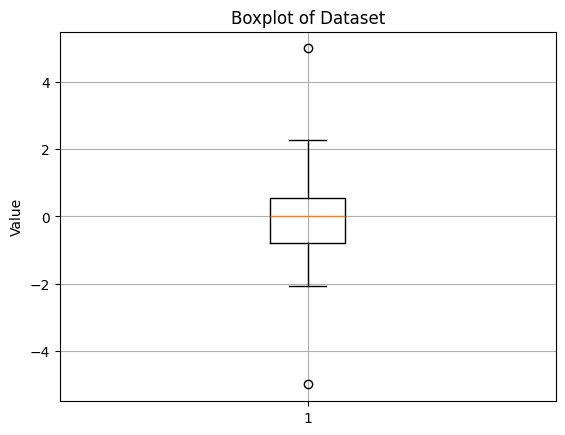

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual dataset)
data = np.random.normal(loc=0, scale=1, size=100)  # Example: normally distributed data
data = np.concatenate((data, [5, -5]))  # Add outliers

# Create the boxplot
plt.boxplot(data)
plt.ylabel('Value')
plt.title('Boxplot of Dataset')

# Customize the plot (optional)
plt.grid(True)

# Show the plot
plt.show()


17. Calculate the interquartile range (IQR) of a dataset.

In [ ]:
def calculate_iqr(data):
    """Calculates the interquartile range (IQR) of a dataset.

    Args:
      data: A list or numpy array of numerical values.

    Returns:
      The IQR of the dataset.
      Returns an error message if the input is invalid.
    """
    if not isinstance(data, (list, np.ndarray)):
        return "Error: Input must be a list or numpy array."
    if not all(isinstance(x, (int, float)) for x in data):
        return "Error: Dataset must contain numerical values."

    data = np.array(data)  # Convert to NumPy array for easier calculations
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    return iqr

# Example usage
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iqr = calculate_iqr(data)
print(f"IQR: {iqr}")


IQR: 4.5


18.  Implement Z-score normalization and explain its significance.

In [ ]:
def z_score_normalize(data):
    """
    Performs Z-score normalization on a dataset.

    Args:
        data: A list or numpy array of numerical values.

    Returns:
        A list of normalized values.
        Returns an error message if the input is invalid.
    """
    if not isinstance(data, (list, np.ndarray)):
        return "Error: Input must be a list or numpy array."
    if not all(isinstance(x, (int, float)) for x in data):
        return "Error: Dataset must contain numerical values."

    data = np.array(data)
    mean = np.mean(data)
    std_dev = np.std(data)

    if std_dev == 0:
      return "Error: Standard deviation cannot be zero."

    normalized_data = (data - mean) / std_dev
    return normalized_data.tolist()

# Example usage
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
normalized_data = z_score_normalize(data)
print(f"Normalized data: {normalized_data}")

#Significance of Z-score normalization:
# 1. Centering and Scaling: It transforms data to have a mean of 0 and a standard deviation of 1. This removes the influence of different scales and units of measurement.
# 2. Outlier Detection: Z-scores help identify outliers. Values with a Z-score far from 0 (typically >3 or <-3) are considered potential outliers.
# 3. Feature Scaling for ML: Many machine learning algorithms are sensitive to feature scaling. Z-score normalization is a common preprocessing step to improve model performance.
# 4. Statistical Analysis: In statistical analysis, Z-scores allow comparisons between data points from different distributions.
# 5. Data standardization:  Useful for comparisons across different datasets or features.


Normalized data: [-1.5666989036012806, -1.2185435916898848, -0.8703882797784892, -0.5222329678670935, -0.17407765595569785, 0.17407765595569785, 0.5222329678670935, 0.8703882797784892, 1.2185435916898848, 1.5666989036012806]


19. Compare two datasets using their standard deviations.

In [ ]:
import numpy as np

def compare_datasets_std(dataset1, dataset2):
    """Compares two datasets based on their standard deviations.

    Args:
      dataset1: A list or numpy array of numerical values.
      dataset2: A list or numpy array of numerical values.

    Returns:
      A string indicating which dataset has a larger standard deviation,
      or a message if the input is invalid or the standard deviations are equal.
    """
    if not isinstance(dataset1, (list, np.ndarray)) or not isinstance(dataset2, (list, np.ndarray)):
        return "Error: Inputs must be lists or numpy arrays."
    if not all(isinstance(x, (int, float)) for x in dataset1) or not all(isinstance(x, (int, float)) for x in dataset2):
        return "Error: Datasets must contain numerical values."

    std_dev1 = np.std(dataset1)
    std_dev2 = np.std(dataset2)

    if std_dev1 > std_dev2:
        return "Dataset 1 has a larger standard deviation."
    elif std_dev2 > std_dev1:
        return "Dataset 2 has a larger standard deviation."
    else:
        return "Datasets have equal standard deviations."

# Example usage
data1 = [1, 2, 3, 4, 5]
data2 = [1, 1, 1, 10, 10]

comparison_result = compare_datasets_std(data1, data2)
comparison_result


'Dataset 2 has a larger standard deviation.'

20. Write a Python program to visualize covariance using a heatmap.

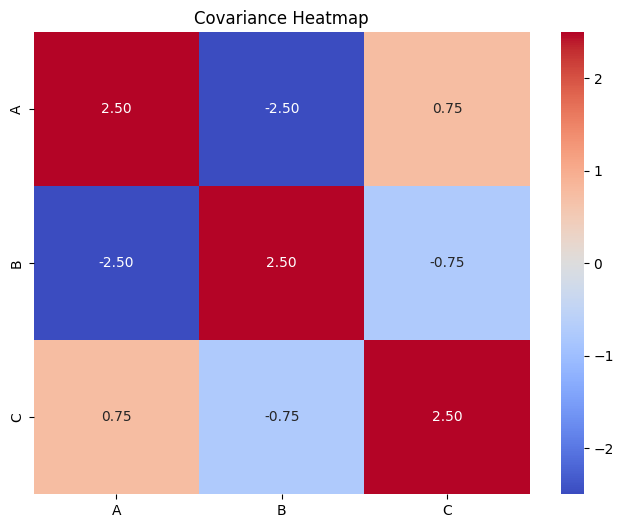

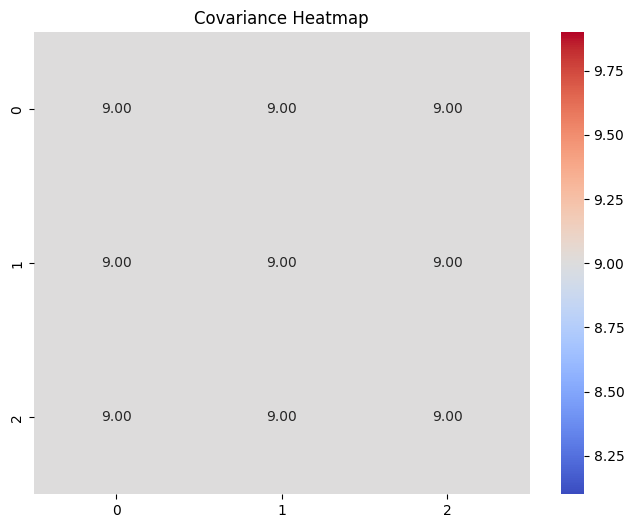

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_covariance_heatmap(data):
    """
    Visualizes the covariance of a dataset using a heatmap.

    Args:
        data: A pandas DataFrame or a NumPy array.
    """
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)  # Convert NumPy array to DataFrame for seaborn

    covariance_matrix = data.cov()
    plt.figure(figsize=(8, 6))
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Covariance Heatmap")
    plt.show()

# Example usage with a DataFrame (replace with your actual DataFrame)
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1], 'C': [2, 4, 1, 5, 3]}
df = pd.DataFrame(data)
visualize_covariance_heatmap(df)

# Example usage with a NumPy array:
data_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
visualize_covariance_heatmap(data_array)


21.  Use seaborn to create a correlation matrix for a dataset.

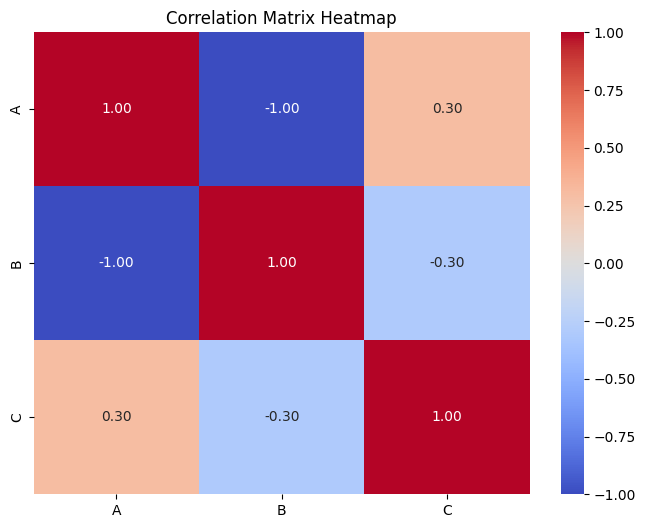

In [ ]:
def visualize_correlation_matrix(data):
    """
    Visualizes the correlation matrix of a dataset using a heatmap.

    Args:
        data: A pandas DataFrame.
    """
    if not isinstance(data, pd.DataFrame):
        return "Error: Input must be a pandas DataFrame"

    correlation_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Example usage (replace with your actual DataFrame)
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1], 'C': [2, 4, 1, 5, 3]}
df = pd.DataFrame(data)
visualize_correlation_matrix(df)


22. Generate a dataset and implement both variance and standard deviation computations.

In [ ]:
import numpy as np

def calculate_variance_std(data):
    """Calculates the variance and standard deviation of a dataset.

    Args:
        data: A list or numpy array of numerical values.

    Returns:
        A dictionary containing the variance and standard deviation.
        Returns an error message if input is invalid.
    """
    if not isinstance(data, (list, np.ndarray)):
        return "Error: Input must be a list or numpy array."
    if not all(isinstance(x, (int, float)) for x in data):
        return "Error: Dataset must contain numerical values."

    data = np.array(data)
    variance = np.var(data)
    std_dev = np.std(data)
    return {"variance": variance, "std_dev": std_dev}


# Example usage: Generate a random dataset
dataset = np.random.rand(100)  # Generate 100 random numbers between 0 and 1
results = calculate_variance_std(dataset)
results


{'variance': 0.08817645622720677, 'std_dev': 0.2969452074494666}

23. Visualize skewness and kurtosis using Python libraries like matplotlib or seaborn.

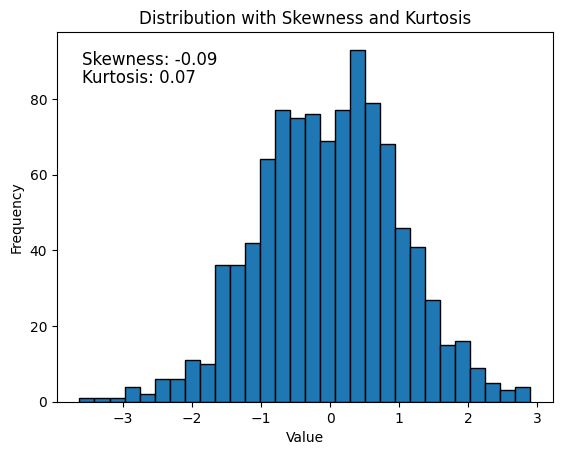

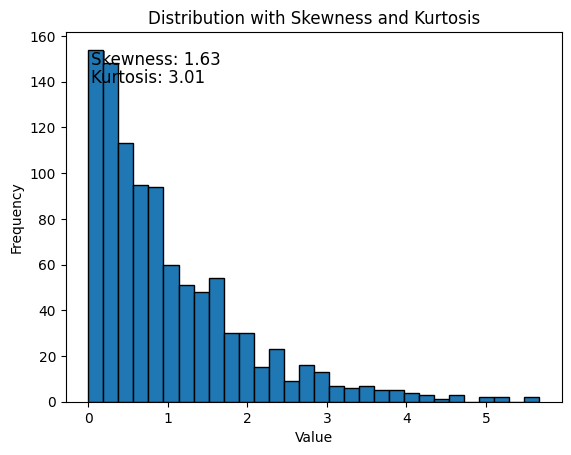

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

def visualize_skewness_kurtosis(data):
    """
    Visualizes the skewness and kurtosis of a dataset.

    Args:
        data: A list or numpy array of numerical values.
    """
    if not isinstance(data, (list, np.ndarray)):
        print("Error: Input must be a list or numpy array.")
        return

    data = np.array(data)  # Convert to numpy array for calculations
    skewness = skew(data)
    kurt = kurtosis(data)

    # Create a figure and an axes
    fig, ax = plt.subplots()

    # Plot the data's distribution
    ax.hist(data, bins=30, edgecolor='black')  # You can customize bins

    # Add text annotations for skewness and kurtosis
    ax.text(0.05, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.90, f'Kurtosis: {kurt:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')


    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution with Skewness and Kurtosis')
    plt.show()

# Example usage:
data = np.random.normal(0, 1, 1000)  # Example normally distributed data
visualize_skewness_kurtosis(data)

data_skewed = np.random.exponential(1, 1000)
visualize_skewness_kurtosis(data_skewed)


24. Implement the Pearson and Spearman correlation coefficients for a dataset.

In [ ]:
import scipy.stats as stats

def calculate_pearson_spearman(dataset1, dataset2):
    """Calculates Pearson and Spearman correlation coefficients.

    Args:
      dataset1: A list or numpy array of numerical values.
      dataset2: A list or numpy array of numerical values.

    Returns:
      A dictionary containing Pearson and Spearman correlation coefficients.
      Returns an error message if the input is invalid.
    """
    if not isinstance(dataset1, (list, np.ndarray)) or not isinstance(dataset2, (list, np.ndarray)):
        return "Error: Inputs must be lists or numpy arrays."

    if len(dataset1) != len(dataset2):
        return "Error: Datasets must have the same length."

    if not all(isinstance(x, (int, float)) for x in dataset1) or not all(isinstance(x, (int, float)) for x in dataset2):
        return "Error: Datasets must contain numerical values."

    dataset1 = np.array(dataset1)
    dataset2 = np.array(dataset2)

    pearson_coef, pearson_p = stats.pearsonr(dataset1, dataset2)
    spearman_coef, spearman_p = stats.spearmanr(dataset1, dataset2)

    return {
        "pearson_correlation": pearson_coef,
        "pearson_p_value": pearson_p,
        "spearman_correlation": spearman_coef,
        "spearman_p_value": spearman_p
    }

# Example Usage
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]
correlations = calculate_pearson_spearman(data1, data2)
correlations


{'pearson_correlation': -1.0,
 'pearson_p_value': 0.0,
 'spearman_correlation': -0.9999999999999999,
 'spearman_p_value': 1.4042654220543672e-24}